In [10]:
from multilevel_base_stock import *
import numpy as np
import copy
import matplotlib.pyplot as plt
env_name = "sku100.multi_store.standard"
exp_name = "dynamic lookback test"
vis_path = os.path.join("output_multilevel", env_name, exp_name)

In [11]:
vis_path = os.path.join("output_multilevel", env_name, exp_name)
env = make_env(env_name, wrapper_names=["DynamicWrapper"], mode="test", vis_path=vis_path)
balance, lookback21_stock_levels_list, GMV, reward, reward_info  = dynamic_base_stock(env)
print(env_name, exp_name, balance)

sku100.multi_store.standard dynamic lookback test [469288.11  592191.465 546976.124]


In [12]:
# -------------------------------test for shift 7 days---------------------------------
level = copy.deepcopy(np.array(lookback21_stock_levels_list))
plus = copy.deepcopy(level[:,-7:,:])
combined_level_7 = np.concatenate([level,plus], axis = 1)
combined_level_7 = combined_level_7[:,7:,:]
env.reset()
balance, _, GMV, reward, reward_info  = dynamic_base_stock(env,static_stock_levels = combined_level_7)
print(env_name, exp_name, balance)

sku100.multi_store.standard dynamic lookback test [479552.104 594803.561 551990.125]


In [13]:
# -------------------------------test for shift 21 days---------------------------------
level = copy.deepcopy(np.array(lookback21_stock_levels_list))
plus = copy.deepcopy(level[:,-21:,:])
combined_level_21 = np.concatenate([level,plus], axis = 1)
combined_level_21 = combined_level_21[:,21:,:]
env.reset()
balance, _, GMV, reward, reward_info  = dynamic_base_stock(env,static_stock_levels = combined_level_21)
print(env_name, exp_name, balance)

sku100.multi_store.standard dynamic lookback test [459757.425 571205.285 527695.905]


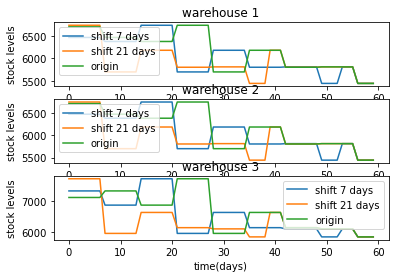

In [14]:
lookback21_stock_levels_list = np.array(lookback21_stock_levels_list)
fig,ax = plt.subplots(3,1)
for i in range(len(env.get_warehouse_list())):
    ax[i].plot(combined_level_7[i].sum(axis = -1))
    ax[i].plot(combined_level_21[i].sum(axis = -1))
    ax[i].plot(lookback21_stock_levels_list[i].sum(axis = -1))
    ax[i].legend(['shift 7 days', 'shift 21 days', 'origin'])
    ax[i].set_title('warehouse {}'.format(i+1))
    ax[i].set_ylabel('stock levels')
    ax[i].set_xlabel('time(days)')
plt.show()